## Importamos Librerias

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from visualization.utils import *
import warnings
warnings.filterwarnings('ignore')

## Carga de datos

In [9]:
data = pd.read_csv("../data/processed/data_clear.csv")


Columnas:

    •  Sex: Género del cangrejo (Macho, Hembra, Indeterminado).
    •  Length: Longitud del cangrejo (en pies; 1 pie = 30.48 cm).
    •  Diameter: Diámetro del cangrejo (en pies; 1 pie = 30.48 cm).
    •  Height: Altura del cangrejo (en pies; 1 pie = 30.48 cm).
    •  Weight: Peso del cangrejo (en onzas; 1 libra = 16 onzas).
    •  Shucked Weight: Peso del cangrejo sin cáscara (en onzas; 1 libra = 16 onzas).
    •  Viscera Weight: Peso de las vísceras del cangrejo (en onzas; 1 libra = 16 onzas).
    •  Shell Weight: Peso de la cáscara del cangrejo (en onzas; 1 libra = 16 onzas).
    •  Age: Edad del cangrejo (en meses).



# Análisis Exploratorio


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Cantidad de Registros y Tipos de Variables:

> Tenemos `3893` registros, en cada una de las `9` variables obtenidas.

> Todas las variables son tipo númerico en particular `Float`, excepto Sex que es de tipo `categórico`.


In [11]:
data.duplicated().sum()

0

No hay valores duplicados

In [9]:
sum_nan = data.isnull().sum()
print(sum_nan)

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


No hay valores nulos

In [8]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


> Se observa que en promedio la `edad` de los cangregos ronda entre lo 10 meses.

> Contamos con algunas edades de 29 meses lo que nos indica posibles autlayes para la `edad`.

> En la columna de `altura` tenemos observaciones con 0 pies.

In [5]:
data[data['Height']==0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
269,I,0.7875,0.575,0.0,3.798833,1.630096,0.807961,9.936500,6
3867,I,1.0750,0.850,0.0,12.133586,5.854172,2.438057,3.260193,8


Dado que las observaciones 269 y 3867 presentan valores nulos en la variable 'altura', se realizará un análisis comparativo con los promedios de altura de individuos de la misma categoría de edad (6-8 años). Este análisis permitirá determinar si estas observaciones se desvían significativamente de la norma, lo que podría indicar un error de medición o la ausencia de esta información.

In [23]:
data[(data['Age']==6) &(data.Height != 0)].describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0
mean,0.921510,0.695677,0.229687,7.741126,3.499332,1.653898,2.190117,6.0
std,0.189893,0.151997,0.055433,5.119950,2.479599,1.087764,1.352437,0.0
min,0.425000,0.312500,0.075000,0.666213,0.255146,0.155922,0.226796,6.0
25%,0.800000,0.587500,0.187500,4.468590,1.867523,0.917815,1.275727,6.0
50%,0.925000,0.675000,0.225000,6.321938,2.827863,1.424562,1.984465,6.0
75%,1.037500,0.787500,0.262500,9.769946,4.557182,2.090776,2.682571,6.0
max,1.650000,1.187500,0.450000,38.824640,18.172030,8.334753,9.922325,6.0


In [24]:
data[(data['Age']==8) &(data.Height != 0)].describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.0
mean,1.253011,0.966089,0.324615,18.443617,8.448998,3.992309,5.135875,8.0
std,0.198068,0.162500,0.125697,8.496709,4.161476,1.946322,2.164788,0.0
min,0.637500,0.487500,0.162500,2.267960,0.893009,0.382718,0.765436,8.0
25%,1.125000,0.875000,0.275000,12.480867,5.386405,2.608154,3.692522,8.0
50%,1.250000,0.962500,0.312500,16.924651,7.852811,3.642911,4.847765,8.0
75%,1.400000,1.087500,0.362500,24.373483,11.318538,5.393492,6.520385,8.0
max,1.800000,1.412500,2.825000,48.477645,23.402512,10.928732,13.324265,8.0


- Dado que las demás variables no presentan anomalías para edades similares, se decidirá imputar los valores faltantes de altura utilizando la media de las alturas correspondientes a las edades de 6 y 8 años.


In [ ]:
# imputacion por la media
data.iloc[269,3] = 0.229687
data.iloc[3867	,3] = 0.324615

## Análisis Univariado

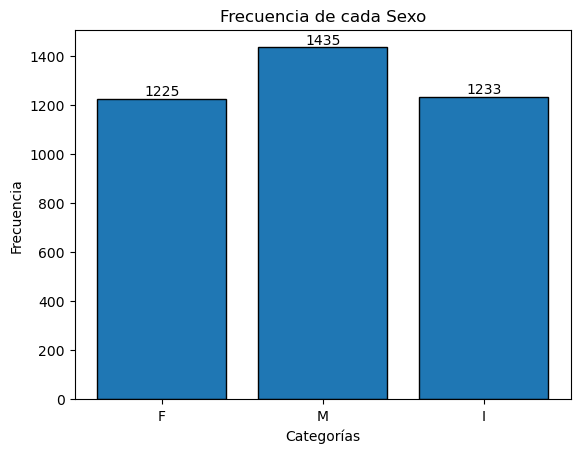

In [4]:
from collections import Counter # para que nos obtenga las distintas catergorias y el número total de cada una


counts = Counter(data["Sex"]) # Nos devuelve un diccionario
categories  = list(counts.keys())
frequencies = list(counts.values())

plt.bar(categories, frequencies, edgecolor = "black")

for i, freq in enumerate(frequencies):
    plt.text(i, freq + 0.2, str(freq), ha = "center", va = "bottom")


plt.title("Frecuencia de cada Sexo")
plt.xlabel("Categorías")
plt.ylabel("Frecuencia")

plt.show()



* Observamos que el conjunto de datos presenta un desequilibrio, con una mayor proporción de cangrejos clasificados como machos. Por otro lado, las categorías de hembras e indeterminados presentan proporciones similares, con una diferencia de aproximadamente 8 observaciones.

* Sería relevante investigar las posibles causas que subyacen a la categoría 'sexo indeterminado'. ¿Existen características biológicas o factores ambientales que podrían explicar esta clasificación? Asimismo, es importante considerar si los criterios utilizados para determinar el sexo son suficientemente claros y consistentes

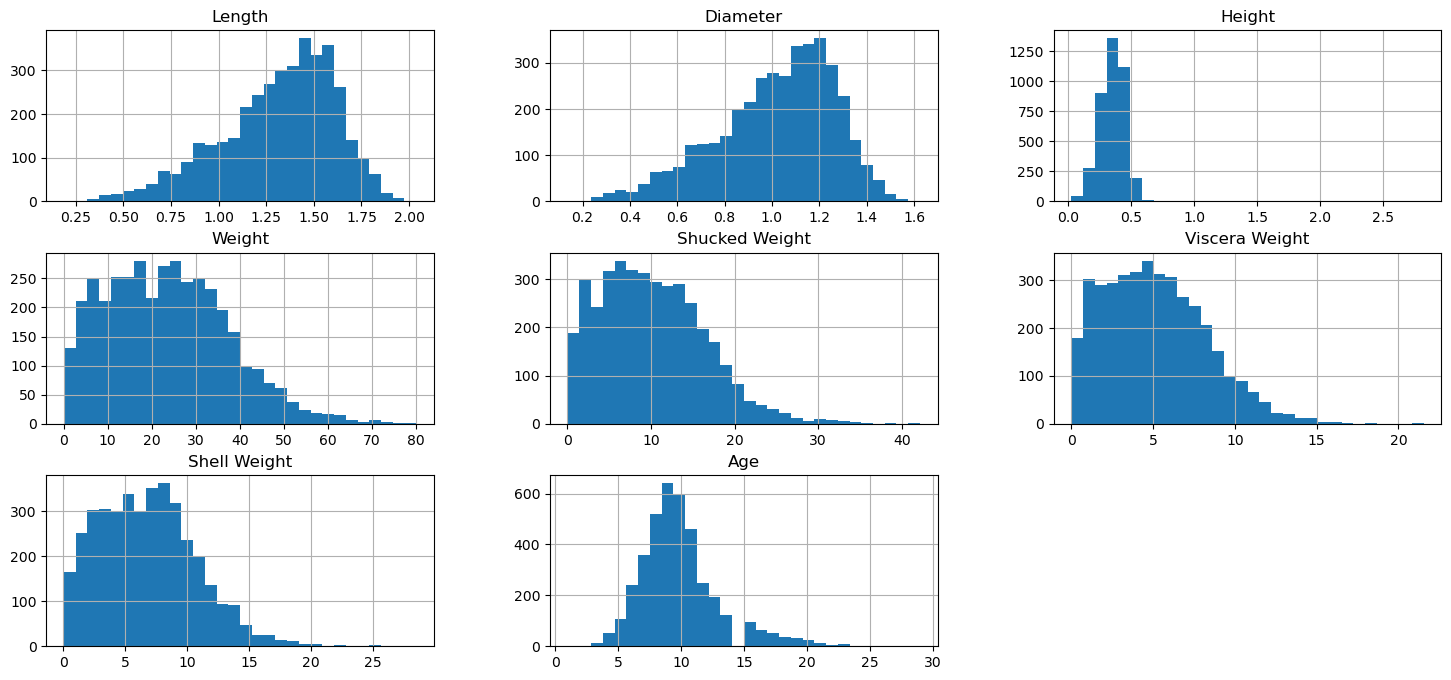

In [12]:
data.hist(bins = 30 ,  figsize=(18, 8))
plt.show()

+ Contamos con distribuciones poco simetricas, y algunas con poca varibilidad como `altura`.
+ Tanto el `Largo` del Cangrejo como el `Diametro` tienen histogramas de frecuencias similares, lo que nos puede llevar a realizar una analisis de correlacion puesto que el cangrego tiene una sierta proporción que debe mantener.
+ De igual forma para las variables que incluyen el `peso` del cangrejo.

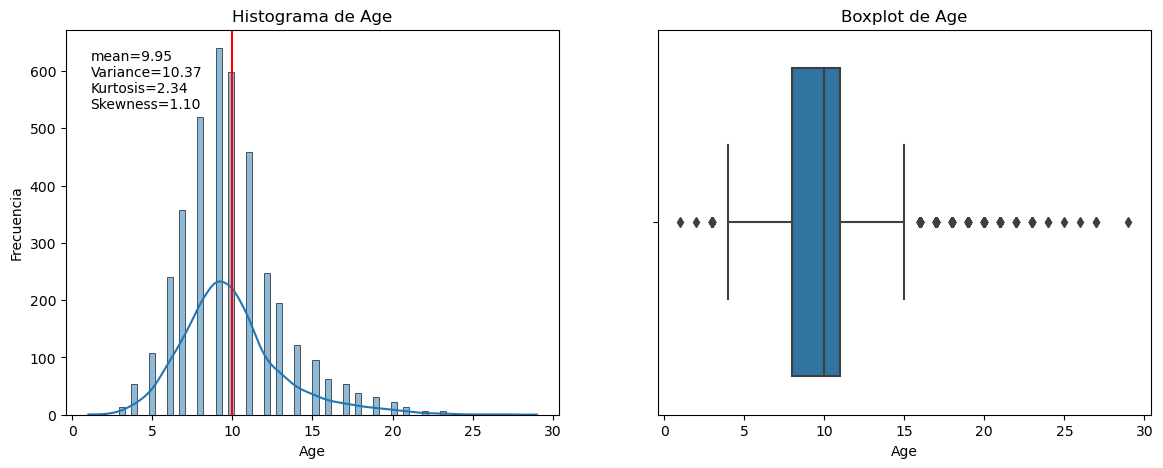

In [40]:
import warnings
warnings.filterwarnings(action='ignore')
histogram_box(data,"Age")

En el grafico de boxplot se observa algunos autliers (valores extremos) inferiores a 3.5 y superiores a 15.5 .

In [8]:
inf= data.Age.quantile(0.25)-(1.5*(data.Age.quantile(0.75) - data.Age.quantile(0.25)))
sup= data.Age.quantile(0.75)+(1.5*(data.Age.quantile(0.75) - data.Age.quantile(0.25)))
print(f"bigote inferior: {inf} \nbigote superior: {sup}")

bigote inferior: 3.5 
bigote superior: 15.5


In [ ]:
print("Numero de outliers encotrados: " ,len(data[data.Age < inf]) + len(data[data.Age>sup]))

Numero de outliers encotrados:  257


Esta cantidad representa un `0.06` del total de los datos, optaremos por aplicar tecnicas de `recorte` o de `limitacion`, esto con el fin de mejorar la forma de la distribución y evitar problemas en el modelo de regresión.

## Análisis multivariado

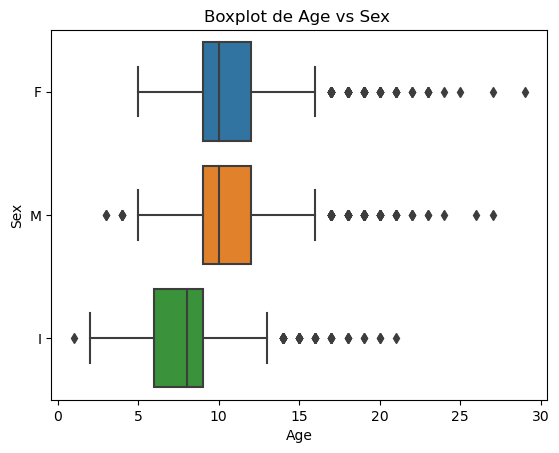

In [6]:
sns.boxplot(data,x='Age',y="Sex")
plt.title("Boxplot de Age vs Sex ")
plt.show()

+ El gráfico muestra que la categoría `Indeterminado` agrupa principalmente a cangrejos menores de 9 meses. Por lo tanto, para determinar el sexo de estos crustáceos de manera confiable, se sugiere realizar observaciones en individuos con una edad superior a este período.

+ Además, es esperable que los valores extremos inferiores se asocien a cangrejos con sexo indeterminado, mientras que los valores extremos superiores correspondan a individuos con sexos definidos (masculino o femenino). Esta relación sugiere una correlación entre los valores de la `Edad` y la madurez sexual de los organismos

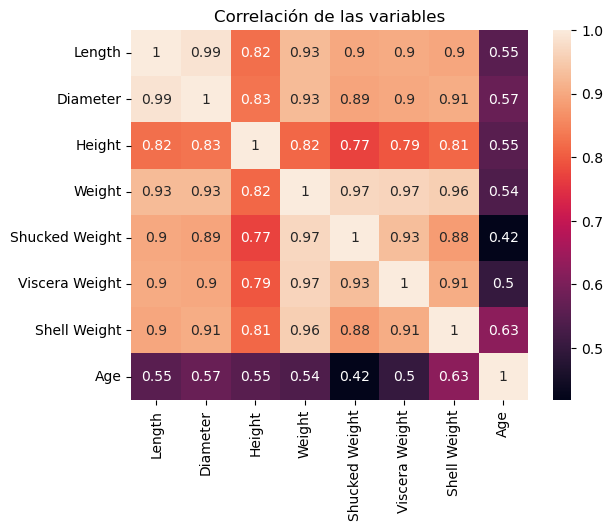

In [19]:
sns.heatmap(data.drop(columns='Sex').corr(),annot=True)
plt.title("Correlación de las variables")
plt.show()

+ Se confirma el supuesto de la fuerte correlación entre `largo` del cangrego y `Diametro`, es decir que cuanto mayor es el largo del cangrejo tambien lo sera su diametro.
+ Las variables que incluyen el peso del cangrejo como `Weight` , `shuc..We`,`Vis..We` y `she..We` tambien presentan una fuerte correlacional positiva, esto era de esperarce, ya que todas se derivan de `Weight`.
+ Por ultimo las variable objetivo `Age` tiene una correlación positiva con `Lenght`,`Diameter` y `Shell Weight`

Nota:
> Tenemos que tener en cuenta que la fuerte correlación entre variables indempendientes puede llevarnos a problemas de multicolinialidad lo que dificultaria el proceso de aprendizaje en nuestros modelos. 

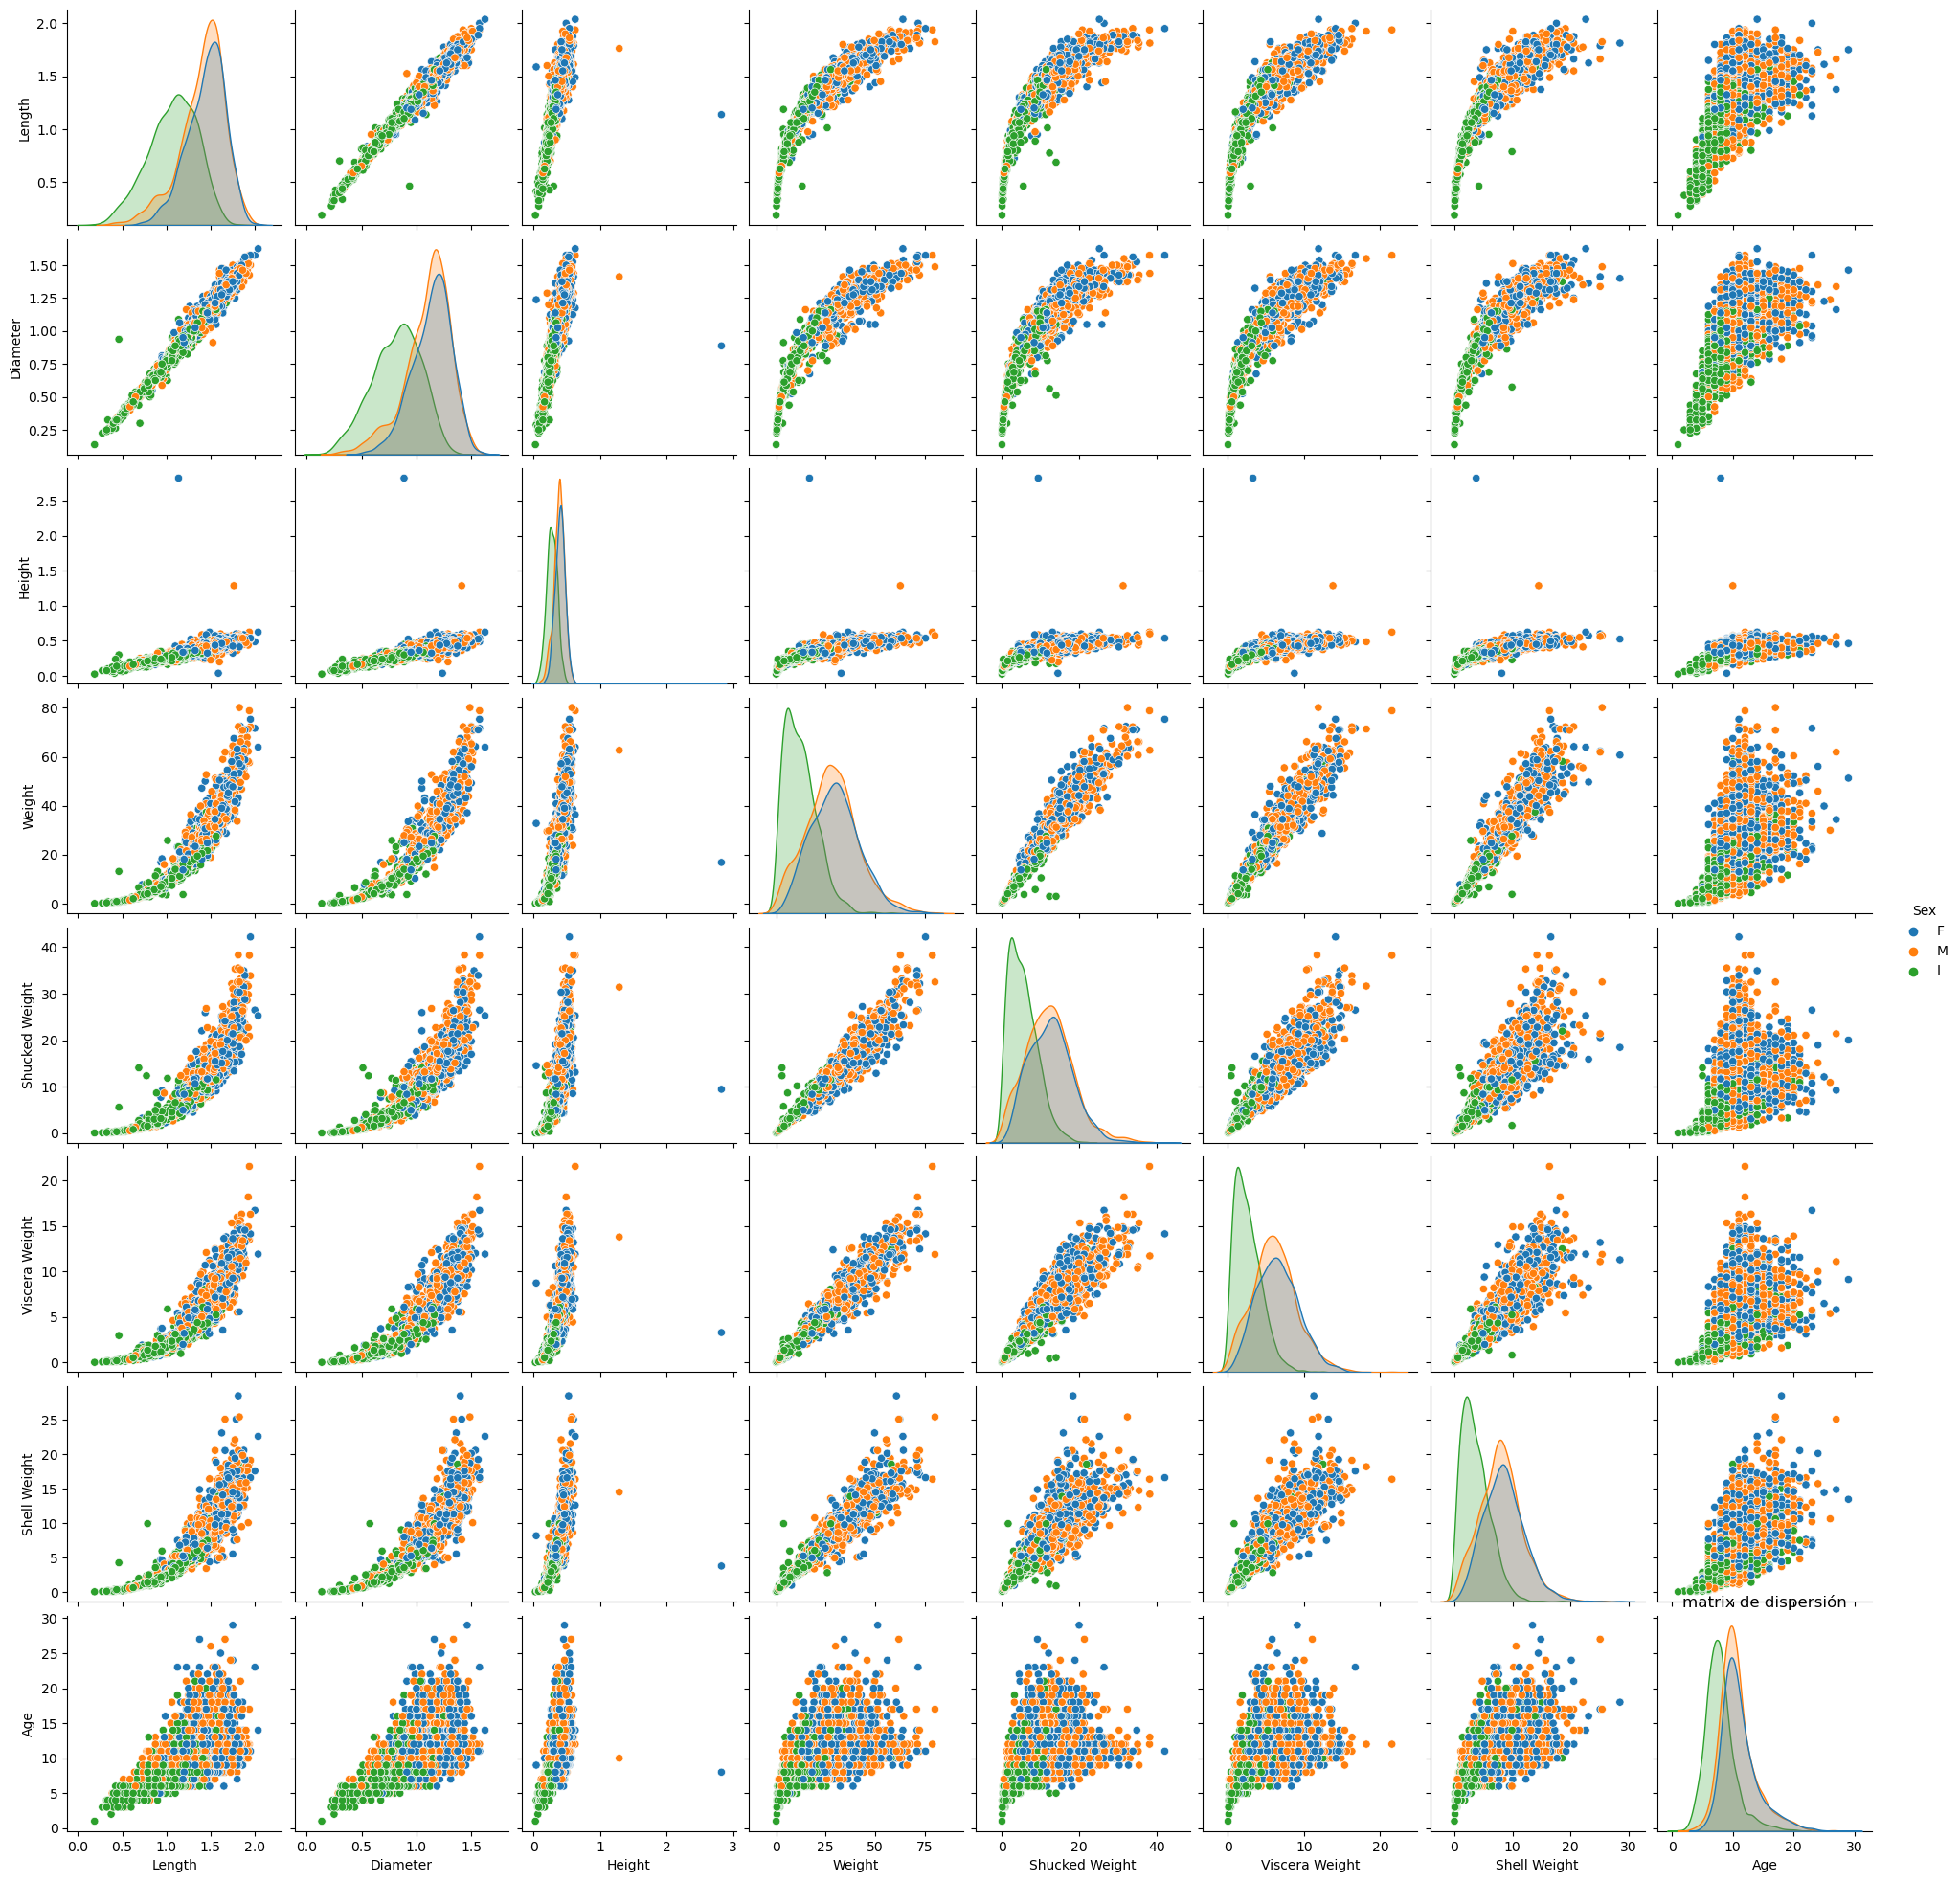

In [18]:
sns.pairplot(data,hue= 'Sex')
plt.title("matrix de dispersión")
plt.show()